In [18]:
import os, logging, pickle, logging, shutil
# import tensorflow as tf
import numpy as np
import time
from collections import defaultdict
import matplotlib.pyplot as plt

# log_file = os.path.abspath("dataprep-vtck-phase2.logs")
# logging.basicConfig(
#     filename=log_file,
#     level=logging.DEBUG,
#     format="%(asctime)s:%(levelname)s:%(message)s"
#     )
# print(f'Log path: {log_file}')

%matplotlib inline

## VCTK
Total Number of Speakers: 109<br>
Max = 508<br>
Min = 46<br>
Mean = 231.57798165137615

### VCTK after cleaning
Total Number of Speakers: 108<br>
Max = 508<br>
Min = 58<br>
Mean = 233.2962962962963

## Librispeech
Total Number of Speakers: 5417<br>
Max = 1104<br>
Min = 2<br>
Mean = 327.10910097840133

### Libri after cleaning
Total Number of Speakers: 5109<br>
Max = 1104<br>
Min = 50<br>
Mean = 345.2041495400274

## Voxceleb-1
Total Number of Speakers: 1251<br>
Max = 2208<br>
Min = 50<br>
Mean = 291.18625099920064


Total Number of Speakers: 108
Max = 508
Min = 58
Mean = 233.2962962962963


(array([10., 10., 16., 20., 22., 13.,  9.,  4.,  2.,  2.]),
 array([ 58., 103., 148., 193., 238., 283., 328., 373., 418., 463., 508.]),
 <a list of 10 Patch objects>)

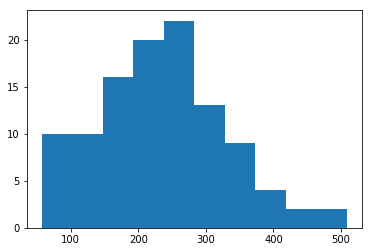

In [31]:
data_path = "vctk_utter_info.b"
# data_path = "librispeech_utter_info.b"
# data_path = "voxceleb-1_utter_info.b"
with open(data_path, "rb") as f:
    train_data_paths = pickle.load(f)
number_of_segments = np.array([x[1][0] for x in train_data_paths])
print(f'Total Number of Speakers: {len(number_of_segments)}')
print(f'Max = {number_of_segments.max()}\nMin = {number_of_segments.min()}\nMean = {number_of_segments.mean()}')
plt.hist(number_of_segments)#[number_of_segments <= 2000])

## In librispeech, out of 5417 speakers, only 308 speakers have < 50 utterences, so removing them

In [26]:
len(number_of_segments[number_of_segments<50])

1

In [27]:
len(number_of_segments)

109

In [28]:
train_data_paths[0]

['/datadrive/dalon/diarizer-dataset/VCTK-Corpus/wav48/p287/p287_041.wav',
 (100, 40, 160),
 '/datadrive/dalon/diarizer-dataset/vctk-vox1n2-libri-npy/vctk_p287.npy']

In [30]:
# dataset_name = 'vctk'
# speaker_list = []
# for item in train_data_paths:
#     if item[1][0] < 50:
#         print(item[1], item[2])
#         os.remove(item[2])
#     else:
#         speaker_list.append(item)
# with open(dataset_name + '_utter_info.b', "wb") as f:
#     pickle.dump(speaker_list, f)

(46, 40, 160) /datadrive/dalon/diarizer-dataset/vctk-vox1n2-libri-npy/vctk_p323.npy


## Plot all data distribution

In [32]:
data_path_1 = "vctk_utter_info.b"
data_path_2 = "librispeech_utter_info.b"
data_path_3 = "voxceleb-1_utter_info.b"
with open(data_path_1, "rb") as f1, open(data_path_2, "rb") as f2, open(data_path_3, "rb") as f3:
    train_data_paths = pickle.load(f1)
    number_of_segments_1 = np.array([x[1][0] for x in train_data_paths])
    train_data_paths = pickle.load(f2)
    number_of_segments_2 = np.array([x[1][0] for x in train_data_paths])
    train_data_paths = pickle.load(f3)
    number_of_segments_3 = np.array([x[1][0] for x in train_data_paths])

Text(0.5,1,'voxceleb-1')

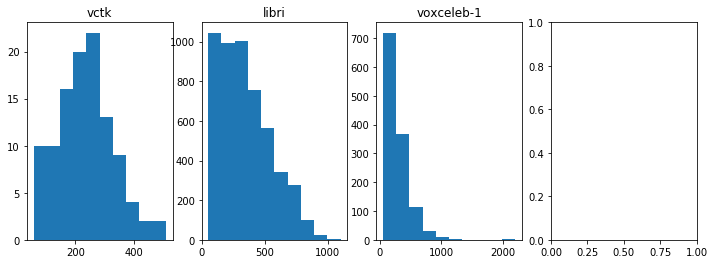

In [39]:
f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(12, 4))
ax1.hist(number_of_segments_1)
ax1.set_title('vctk')
ax2.hist(number_of_segments_2)
ax2.set_title('libri')
ax3.hist(number_of_segments_3)
ax3.set_title('voxceleb-1')